# PETV76 PROJECT : Electric Vehicle Dataset Analysis and Visualization

In [1]:
#🔧 Core Libraries
import numpy as np 
import pandas as pd
# 📊 Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# 📂 Excel File Handling (if needed)
import openpyxl

### 📥 Load the Dataset

In [2]:
df = pd.read_excel('cleanedprojectdataset.xlsx')
# Display the first few rows
print(df.head(5))

  Vehicle Identification Numbers   Country       City  Postal Code  \
0                     1N4BZ0CP5G      King    Seattle        98125   
1                     KNDJX3AEXG      King     Renton        98058   
2                     5YJ3E1EB2J      King    Seattle        98115   
3                     1C4RJXN64R    Kitsap  Bremerton        98312   
4                     5YJ3E1EB1J  Thurston    Olympia        98512   

   Model Year Manufacturer     Model                   Electric Vehicle Type  \
0        2016       NISSAN      LEAF          Battery Electric Vehicle (BEV)   
1        2016          KIA      SOUL          Battery Electric Vehicle (BEV)   
2        2018        TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
3        2024         JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
4        2018        TESLA   MODEL 3          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0           Clean Alternative Fuel Vehicle 

### Basic Info & Overview 

In [3]:
# Shape and columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary stats for numeric columns
df.describe()


Shape: (1000, 13)

Columns:
 Index(['Vehicle Identification Numbers', 'Country', 'City', 'Postal Code',
       'Model Year', 'Manufacturer', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Vehicle Range(Miles)', 'Base Price ($)',
       'Legislative District', 'Utility Provider'],
      dtype='object')

Data Types:
 Vehicle Identification Numbers                       object
Country                                              object
City                                                 object
Postal Code                                           int64
Model Year                                            int64
Manufacturer                                         object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Vehicle Range(Miles)                         int64
Base Price ($)     

,Postal Code,Model Year,Electric Vehicle Range(Miles),Base Price ($),Legislative District
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,98247.085000,2020.500000,74.768000,56868.420000,29.28300
std,285.887494,3.500894,97.349448,1826.616443,15.29074
min,98001.000000,2000.000000,0.000000,31950.000000,0.00000
25%,98034.000000,2018.000000,0.000000,56925.000000,17.00000
50%,98121.500000,2021.000000,25.000000,56925.000000,34.00000
75%,98367.000000,2023.000000,150.000000,56925.000000,44.00000
max,99362.000000,2026.000000,330.000000,69900.000000,49.00000


### Data Cleaning

### 1. Distribution of Model Years

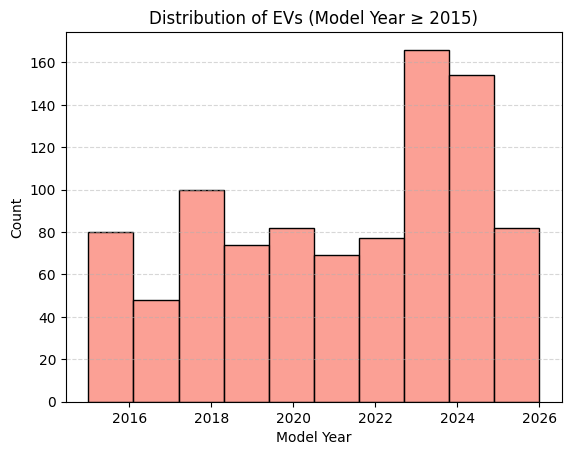

In [4]:
# Now use the corrected column names
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Filter recent model years
recent = df[df['Model Year'] >= 2015]

# Histogram of recent model years
sns.histplot(recent['Model Year'], bins=10, color='salmon')
plt.title("Distribution of EVs (Model Year ≥ 2015)")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()


### 2. Countplot of all model years

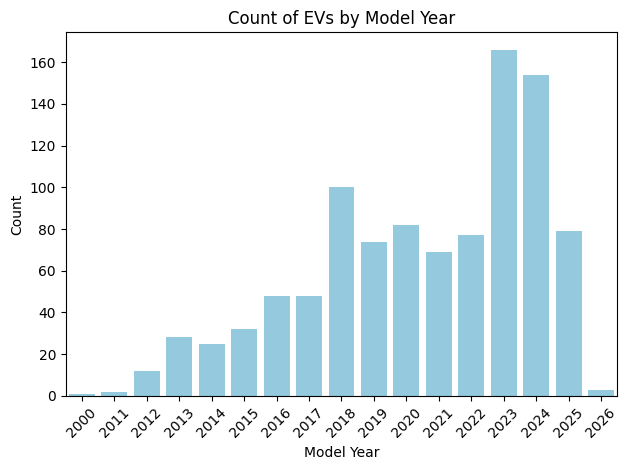

In [5]:
sns.countplot(x='Model Year', data=df, color='skyblue')
plt.title("Count of EVs by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. EV Range vs Base Price

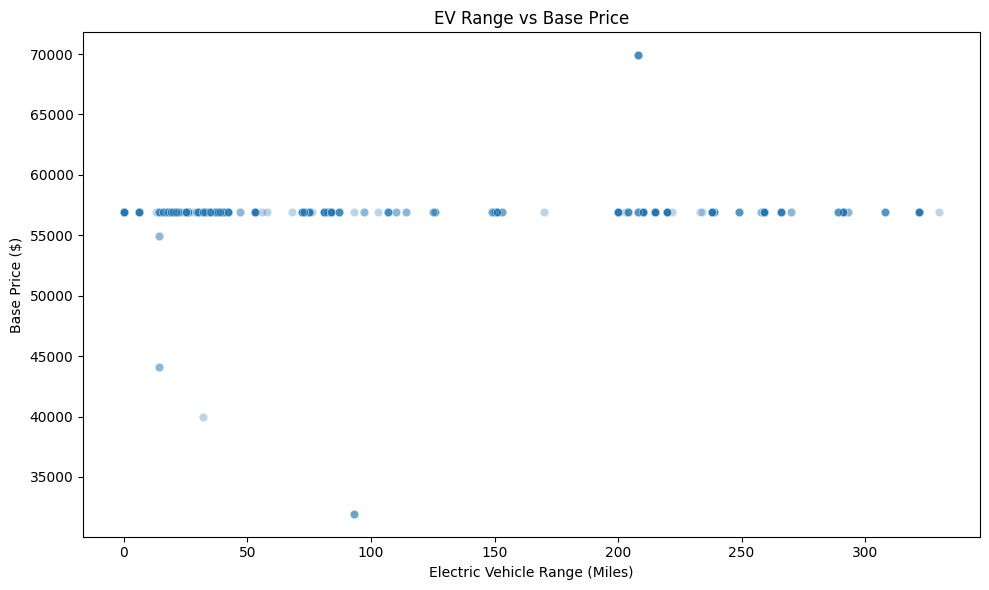

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric Vehicle Range(Miles)', y='Base Price ($)', alpha=0.3)
plt.title("EV Range vs Base Price")
plt.xlabel("Electric Vehicle Range (Miles)")
plt.ylabel("Base Price ($)")
plt.tight_layout()
plt.show()


### 4. Top 15 Manufacturers

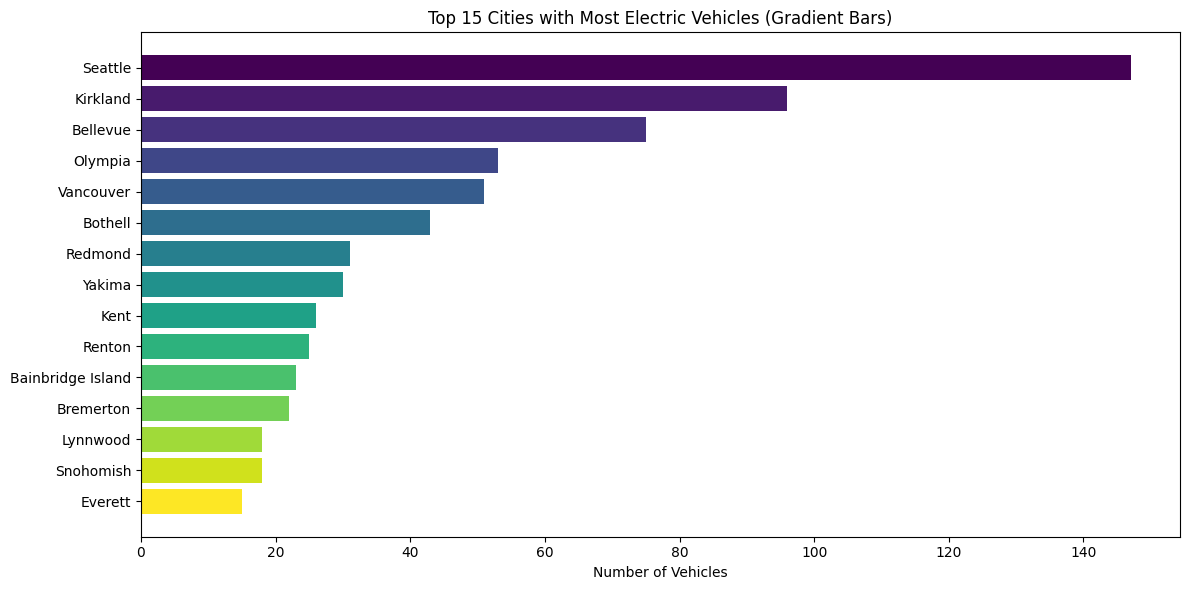

In [16]:
top_cities = df['City'].value_counts().head(15)
# Plot with gradient bars
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_cities)))
bars = plt.barh(top_cities.index, top_cities.values, color=colors)
plt.title("Top 15 Cities with Most Electric Vehicles (Gradient Bars)")
plt.xlabel("Number of Vehicles")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

### 5. EV Type Pie Chart

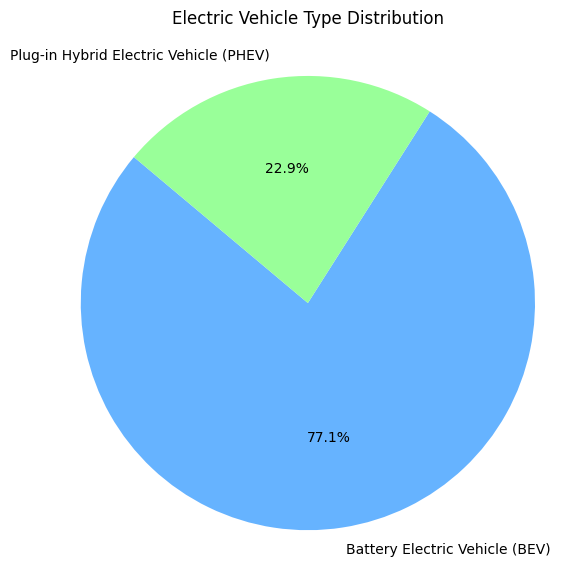

In [17]:
ev_type_counts = df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ev_type_counts, labels=ev_type_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=140)
plt.title("Electric Vehicle Type Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 6. CAFV Eligibility

C:\Users\saksh\AppData\Local\Temp\ipykernel_3492\1487706961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cafv_counts.values, y=cafv_counts.index, palette='pastel')


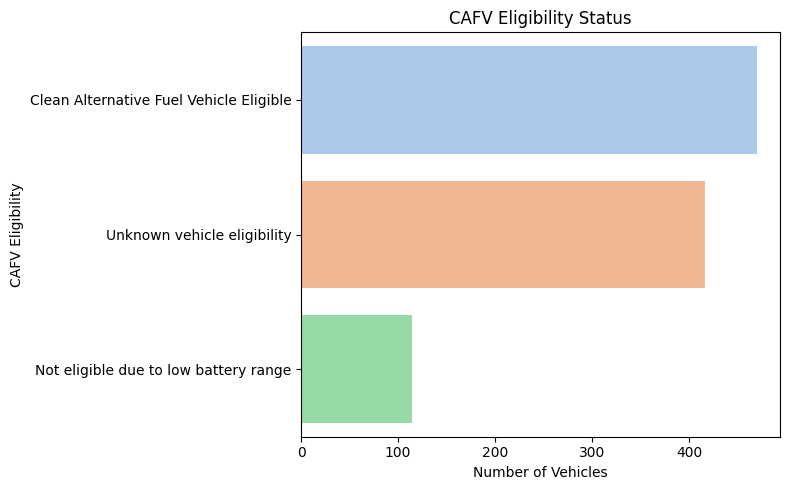

In [18]:
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=cafv_counts.values, y=cafv_counts.index, palette='pastel')
plt.title("CAFV Eligibility Status")
plt.xlabel("Number of Vehicles")
plt.ylabel("CAFV Eligibility")
plt.tight_layout()
plt.show()

### 7. 🔬Top 15 Cities with the Most EVs

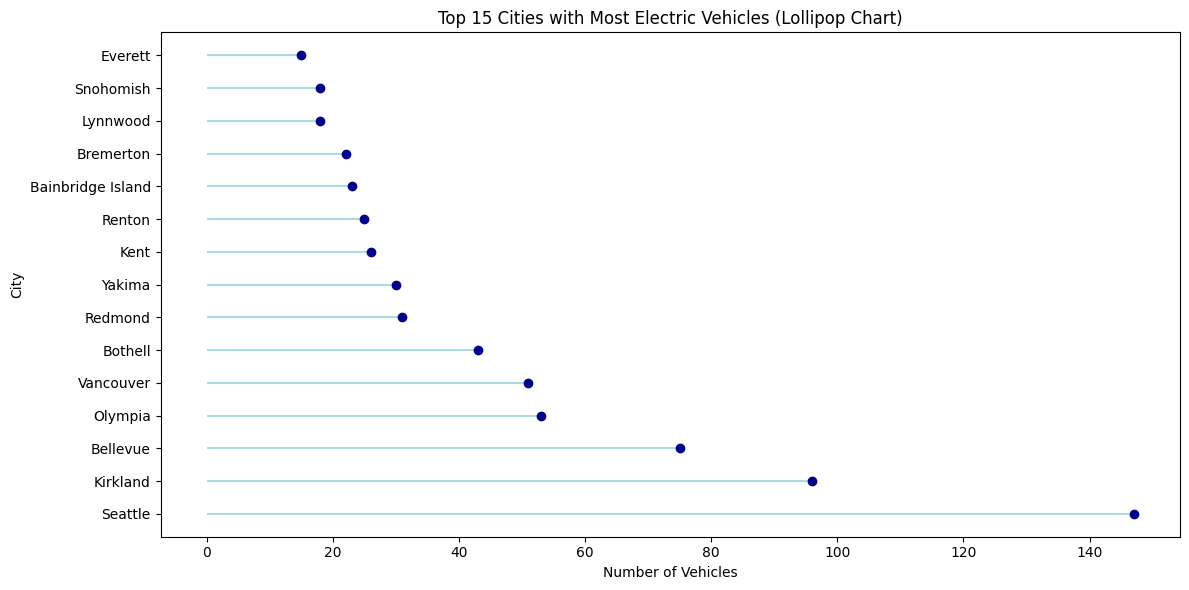

In [19]:
plt.figure(figsize=(12, 6))
plt.hlines(y=top_cities.index, xmin=0, xmax=top_cities.values, color='lightblue')
plt.plot(top_cities.values, top_cities.index, "o", color='darkblue')
plt.title("Top 15 Cities with Most Electric Vehicles (Lollipop Chart)")
plt.xlabel("Number of Vehicles")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### 8. 🌬️ Average EV Range by Manufacturer (Top 15 Only)

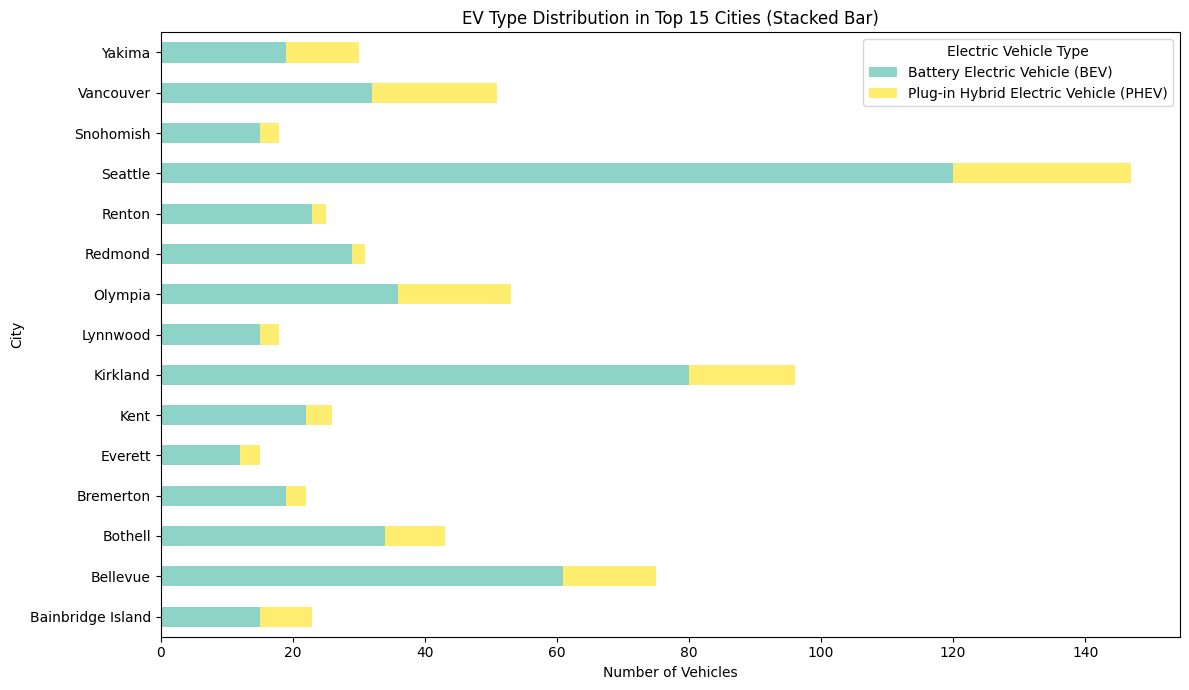

In [20]:
# Stacked Bar Chart (Compare EV Types per City)
top_city_names = top_cities.index.tolist()
city_type_grouped = df[df['City'].isin(top_city_names)].groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)

city_type_grouped.plot(kind='barh', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title("EV Type Distribution in Top 15 Cities (Stacked Bar)")
plt.xlabel("Number of Vehicles")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### 9. 🌫️ Boxplot: Base Price by EV Type

C:\Users\saksh\AppData\Local\Temp\ipykernel_3492\145887131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Electric Vehicle Type', y='Base Price ($)', palette='Set2')


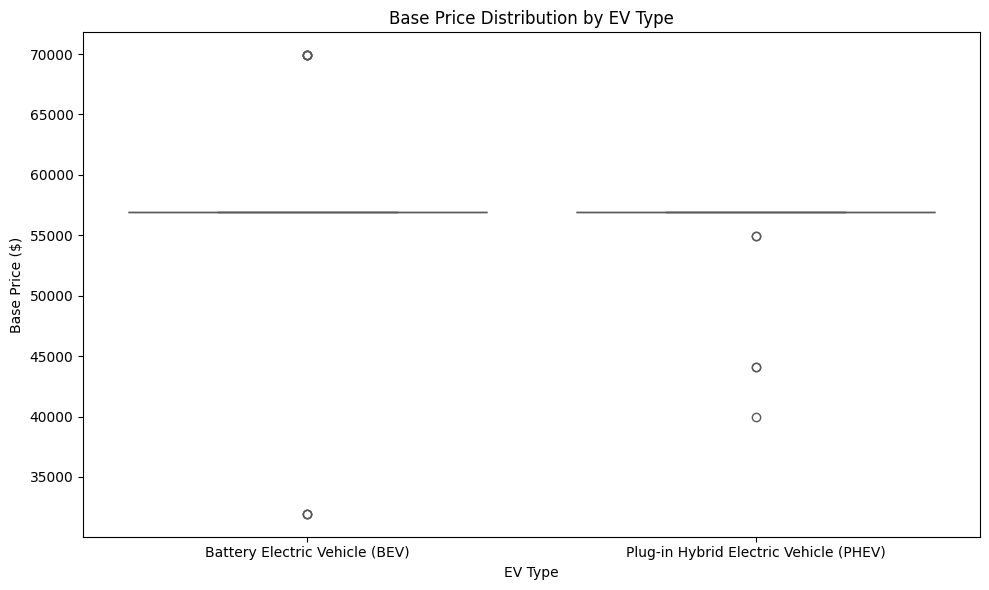

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Electric Vehicle Type', y='Base Price ($)', palette='Set2')
plt.title("Base Price Distribution by EV Type")
plt.xlabel("EV Type")
plt.ylabel("Base Price ($)")
plt.tight_layout()
plt.show()

### 10. 🚨Heatmap of Correlations

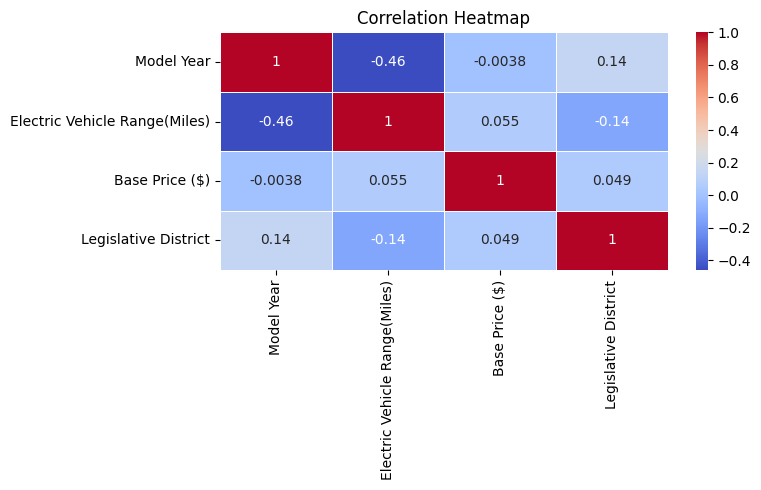

In [22]:
plt.figure(figsize=(8, 5))
corr = df[['Model Year', 'Electric Vehicle Range(Miles)', 'Base Price ($)', 'Legislative District']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 11. useing the Interquartile Range (IQR) method:

In [23]:
# Step 1: Use IQR to filter out outliers from 'Base Price ($)'
Q1 = df['Base Price ($)'].quantile(0.25)
Q3 = df['Base Price ($)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Filter the DataFrame
df_no_outliers = df[(df['Base Price ($)'] >= lower_bound) & (df['Base Price ($)'] <= upper_bound)]

### 12. Replot Boxplot without outliers

C:\Users\saksh\AppData\Local\Temp\ipykernel_3492\2155039241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_outliers, x='Electric Vehicle Type', y='Base Price ($)', palette='Set2')


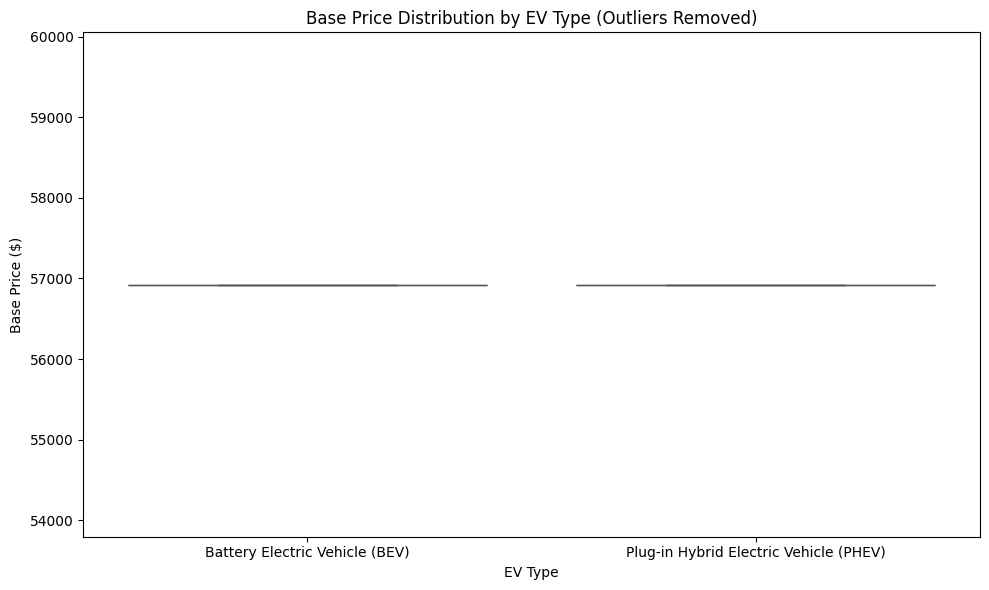

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='Electric Vehicle Type', y='Base Price ($)', palette='Set2')
plt.title("Base Price Distribution by EV Type (Outliers Removed)")
plt.xlabel("EV Type")
plt.ylabel("Base Price ($)")
plt.tight_layout()
plt.show()


### 13. Replot Heatmap without outliers

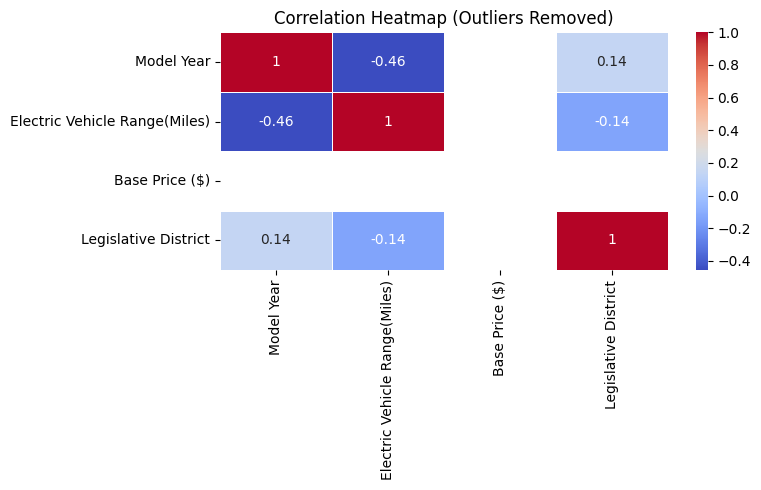

In [25]:
plt.figure(figsize=(8, 5))
corr = df_no_outliers[['Model Year', 'Electric Vehicle Range(Miles)', 'Base Price ($)', 'Legislative District']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Outliers Removed)")
plt.tight_layout()
plt.show()